In [18]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from attention_seq2seq import AttentionSeq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq
import datetime

In [17]:
# 載入資料
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 反轉輸入內容
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# 設定超參數
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    print(datetime.datetime.now())
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))


model.save_params()


2019-06-06 01:23:07.704115
| epoch 1 |  iter 1 / 351 | time 0[s] | loss 4.08
| epoch 1 |  iter 21 / 351 | time 10[s] | loss 3.09
| epoch 1 |  iter 41 / 351 | time 20[s] | loss 1.90
| epoch 1 |  iter 61 / 351 | time 30[s] | loss 1.72
| epoch 1 |  iter 81 / 351 | time 41[s] | loss 1.46
| epoch 1 |  iter 101 / 351 | time 51[s] | loss 1.19
| epoch 1 |  iter 121 / 351 | time 62[s] | loss 1.14
| epoch 1 |  iter 141 / 351 | time 72[s] | loss 1.09
| epoch 1 |  iter 161 / 351 | time 83[s] | loss 1.06
| epoch 1 |  iter 181 / 351 | time 92[s] | loss 1.04
| epoch 1 |  iter 201 / 351 | time 101[s] | loss 1.03
| epoch 1 |  iter 221 / 351 | time 111[s] | loss 1.02
| epoch 1 |  iter 241 / 351 | time 120[s] | loss 1.02
| epoch 1 |  iter 261 / 351 | time 129[s] | loss 1.01
| epoch 1 |  iter 281 / 351 | time 137[s] | loss 1.00
| epoch 1 |  iter 301 / 351 | time 146[s] | loss 1.00
| epoch 1 |  iter 321 / 351 | time 155[s] | loss 1.00
| epoch 1 |  iter 341 / 351 | time 163[s] | loss 1.00
Q 10/15/94        

val acc 99.920%
2019-06-06 01:42:46.056704
| epoch 6 |  iter 1 / 351 | time 0[s] | loss 0.00
| epoch 6 |  iter 21 / 351 | time 9[s] | loss 0.00
| epoch 6 |  iter 41 / 351 | time 18[s] | loss 0.00
| epoch 6 |  iter 61 / 351 | time 27[s] | loss 0.00
| epoch 6 |  iter 81 / 351 | time 36[s] | loss 0.00
| epoch 6 |  iter 101 / 351 | time 46[s] | loss 0.00
| epoch 6 |  iter 121 / 351 | time 55[s] | loss 0.00
| epoch 6 |  iter 141 / 351 | time 64[s] | loss 0.00
| epoch 6 |  iter 161 / 351 | time 74[s] | loss 0.00
| epoch 6 |  iter 181 / 351 | time 83[s] | loss 0.00
| epoch 6 |  iter 201 / 351 | time 92[s] | loss 0.00
| epoch 6 |  iter 221 / 351 | time 101[s] | loss 0.00
| epoch 6 |  iter 241 / 351 | time 111[s] | loss 0.00
| epoch 6 |  iter 261 / 351 | time 123[s] | loss 0.00
| epoch 6 |  iter 281 / 351 | time 134[s] | loss 0.00
| epoch 6 |  iter 301 / 351 | time 145[s] | loss 0.00
| epoch 6 |  iter 321 / 351 | time 156[s] | loss 0.00
| epoch 6 |  iter 341 / 351 | time 168[s] | loss 0.00
Q 10

val acc 100.000%


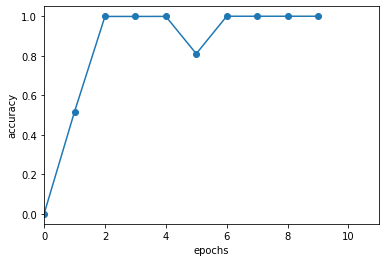

In [11]:
# 繪圖
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(-0.05, 1.05)
plt.xlim(0, 11)
plt.show()

In [19]:
model_s2s = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model_s2s, optimizer)

acc_list_s2s = []
for epoch in range(max_epoch):
    print(datetime.datetime.now())
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model_s2s, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list_s2s.append(acc)
    print('val acc %.3f%%' % (acc * 100))


model_s2s.save_params()


2019-06-06 10:41:53.134099
| epoch 1 |  iter 1 / 351 | time 0[s] | loss 4.08
| epoch 1 |  iter 21 / 351 | time 6[s] | loss 3.21
| epoch 1 |  iter 41 / 351 | time 12[s] | loss 1.91
| epoch 1 |  iter 61 / 351 | time 18[s] | loss 1.78
| epoch 1 |  iter 81 / 351 | time 24[s] | loss 1.68
| epoch 1 |  iter 101 / 351 | time 30[s] | loss 1.47
| epoch 1 |  iter 121 / 351 | time 37[s] | loss 1.24
| epoch 1 |  iter 141 / 351 | time 43[s] | loss 1.17
| epoch 1 |  iter 161 / 351 | time 49[s] | loss 1.13
| epoch 1 |  iter 181 / 351 | time 56[s] | loss 1.08
| epoch 1 |  iter 201 / 351 | time 62[s] | loss 1.06
| epoch 1 |  iter 221 / 351 | time 68[s] | loss 1.05
| epoch 1 |  iter 241 / 351 | time 74[s] | loss 1.04
| epoch 1 |  iter 261 / 351 | time 80[s] | loss 1.03
| epoch 1 |  iter 281 / 351 | time 86[s] | loss 1.03
| epoch 1 |  iter 301 / 351 | time 92[s] | loss 1.02
| epoch 1 |  iter 321 / 351 | time 98[s] | loss 1.02
| epoch 1 |  iter 341 / 351 | time 104[s] | loss 1.02
Q 10/15/94                

val acc 0.000%
2019-06-06 10:55:43.550309
| epoch 6 |  iter 1 / 351 | time 0[s] | loss 0.98
| epoch 6 |  iter 21 / 351 | time 6[s] | loss 0.98
| epoch 6 |  iter 41 / 351 | time 12[s] | loss 0.98
| epoch 6 |  iter 61 / 351 | time 19[s] | loss 0.98
| epoch 6 |  iter 81 / 351 | time 25[s] | loss 0.98
| epoch 6 |  iter 101 / 351 | time 31[s] | loss 0.98
| epoch 6 |  iter 121 / 351 | time 38[s] | loss 0.98
| epoch 6 |  iter 141 / 351 | time 44[s] | loss 0.98
| epoch 6 |  iter 161 / 351 | time 50[s] | loss 0.98
| epoch 6 |  iter 181 / 351 | time 56[s] | loss 0.98
| epoch 6 |  iter 201 / 351 | time 62[s] | loss 0.98
| epoch 6 |  iter 221 / 351 | time 68[s] | loss 0.98
| epoch 6 |  iter 241 / 351 | time 74[s] | loss 0.98
| epoch 6 |  iter 261 / 351 | time 80[s] | loss 0.98
| epoch 6 |  iter 281 / 351 | time 86[s] | loss 0.98
| epoch 6 |  iter 301 / 351 | time 92[s] | loss 0.98
| epoch 6 |  iter 321 / 351 | time 98[s] | loss 0.98
| epoch 6 |  iter 341 / 351 | time 105[s] | loss 0.97
Q 10/15/94 

val acc 0.060%


In [ ]:
model_ps2s = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model_ps2s, optimizer)

acc_list_ps2s = []
for epoch in range(max_epoch):
    print(datetime.datetime.now())
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model_ps2s, question, correct,
                                    id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list_ps2s.append(acc)
    print('val acc %.3f%%' % (acc * 100))


model_ps2s.save_params()


2019-06-06 11:11:51.391664
| epoch 1 |  iter 1 / 351 | time 0[s] | loss 4.08
| epoch 1 |  iter 21 / 351 | time 5[s] | loss 2.92
| epoch 1 |  iter 41 / 351 | time 12[s] | loss 1.91
| epoch 1 |  iter 61 / 351 | time 21[s] | loss 1.78
| epoch 1 |  iter 81 / 351 | time 28[s] | loss 1.74
| epoch 1 |  iter 101 / 351 | time 36[s] | loss 1.64
| epoch 1 |  iter 121 / 351 | time 44[s] | loss 1.40
| epoch 1 |  iter 141 / 351 | time 52[s] | loss 1.18
| epoch 1 |  iter 161 / 351 | time 60[s] | loss 1.11
| epoch 1 |  iter 181 / 351 | time 68[s] | loss 1.07
| epoch 1 |  iter 201 / 351 | time 75[s] | loss 1.05
| epoch 1 |  iter 221 / 351 | time 83[s] | loss 1.04
| epoch 1 |  iter 241 / 351 | time 90[s] | loss 1.03
| epoch 1 |  iter 261 / 351 | time 98[s] | loss 1.03
| epoch 1 |  iter 281 / 351 | time 105[s] | loss 1.02
| epoch 1 |  iter 301 / 351 | time 112[s] | loss 1.01
| epoch 1 |  iter 321 / 351 | time 120[s] | loss 1.01
| epoch 1 |  iter 341 / 351 | time 127[s] | loss 1.00
Q 10/15/94             

val acc 98.580%
2019-06-06 11:26:59.367467
| epoch 6 |  iter 1 / 351 | time 0[s] | loss 0.02
| epoch 6 |  iter 21 / 351 | time 6[s] | loss 0.02
| epoch 6 |  iter 41 / 351 | time 12[s] | loss 0.01
| epoch 6 |  iter 61 / 351 | time 18[s] | loss 0.01
| epoch 6 |  iter 81 / 351 | time 24[s] | loss 0.01
| epoch 6 |  iter 101 / 351 | time 29[s] | loss 0.01
| epoch 6 |  iter 121 / 351 | time 35[s] | loss 0.01
| epoch 6 |  iter 141 / 351 | time 41[s] | loss 0.01
| epoch 6 |  iter 161 / 351 | time 47[s] | loss 0.01
| epoch 6 |  iter 181 / 351 | time 53[s] | loss 0.01
| epoch 6 |  iter 201 / 351 | time 59[s] | loss 0.01
| epoch 6 |  iter 221 / 351 | time 65[s] | loss 0.01
| epoch 6 |  iter 241 / 351 | time 71[s] | loss 0.01
| epoch 6 |  iter 261 / 351 | time 76[s] | loss 0.01
| epoch 6 |  iter 281 / 351 | time 82[s] | loss 0.01
| epoch 6 |  iter 301 / 351 | time 88[s] | loss 0.01
| epoch 6 |  iter 321 / 351 | time 94[s] | loss 0.01
| epoch 6 |  iter 341 / 351 | time 100[s] | loss 0.01
Q 10/15/94

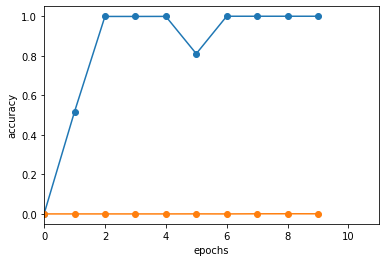

In [20]:
# 繪圖
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.plot(x, acc_list_s2s, marker='s')
plt.plot(x, acc_list_ps2s, marker='p')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(-0.05, 1.05)
plt.xlim(0, 11)
plt.show()